In [1]:
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

### Swahili

In [4]:
sample_swah='data/SWAHILI/data/train/wav/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part10.wav'

In [5]:
x , sr=librosa.load(sample_swah)

In [6]:
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [7]:
print(x)
print(sr)

[0.02953335 0.03225018 0.02603412 ... 0.09593043 0.09478676 0.05775513]
22050


In [8]:
ipd.Audio(sample_swah)

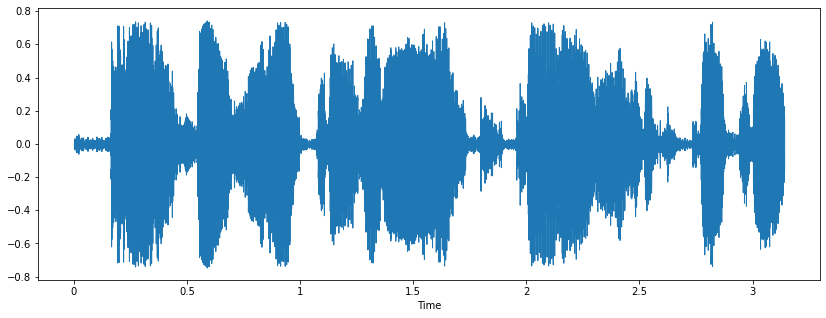

In [9]:
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

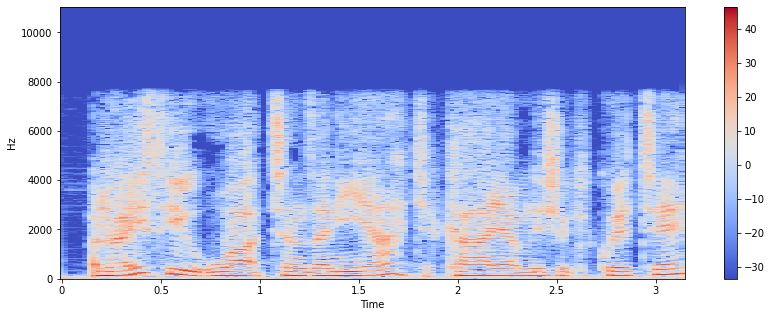

In [10]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [2]:
def tran_loader(filename):
  name_to_text = {}
  with open (filename, encoding="utf-8")as f:
    f.readline()
    for line in f:
      name=line.split("\t")[0]
#       name=name.replace('(', '')
#       name=name.replace(')', '')
#       name=name.replace('\n','')
#       name=name.replace(' ','')
      text=line.split("\t")[1]
      text=text.replace('\n','')
#       text=text.replace("<s>","")
      name_to_text[name]=text
    return name_to_text

In [3]:
transcription=tran_loader("data/SWAHILI/data/train/text")

In [4]:
transcription

{'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100': 'yanayo andaliwa nami pendo pondo idhaa ya kiswahili',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101': 'inayokutangazia moja kwa moja kutoka jijini dar es salaam tanzania',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part102': 'juma hili bara la afrika limeshuhudia raia wa nchi za niger',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part103': 'wakipiga kura ya maoni ilikufanya mabadiliko ya',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part104': 'kule abidjan raia wa jiji hilo',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part105': 'walipata fursa ya kutumia haki yao ya msingi',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part106': 'waziri mkuu wa zamani alasane watara',
 'SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part107': 'na rais aliyetangulia henry konan berd

In [5]:
def meta_data(trans, path ):
  target=[]
  features=[]
  filenames=[]
  duration_of_recordings=[]
  for k in trans:
    filename=path+k +".wav"
    filenames.append(filename)
    audio, fs = librosa.load(filename, sr=None)
    duration_of_recordings.append(float(len(audio)/fs))
   
    lable = trans[k]
    target.append(lable)
  return filenames, target,duration_of_recordings

In [6]:
filenames, target,duration_of_recordings= meta_data(transcription,'data/SWAHILI/data/train/wav/')

In [7]:
import pandas as pd 
data=pd.DataFrame({'key': filenames,'text': target, 'duration':duration_of_recordings})

In [8]:
data

,key,text,duration
0,data/SWAHILI/data/train/wav/SWH-05-20101106_16...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,3.100000
1,data/SWAHILI/data/train/wav/SWH-05-20101106_16...,inayokutangazia moja kwa moja kutoka jijini da...,3.650000
2,data/SWAHILI/data/train/wav/SWH-05-20101106_16...,juma hili bara la afrika limeshuhudia raia wa ...,3.900000
3,data/SWAHILI/data/train/wav/SWH-05-20101106_16...,wakipiga kura ya maoni ilikufanya mabadiliko ya,2.940000
4,data/SWAHILI/data/train/wav/SWH-05-20101106_16...,kule abidjan raia wa jiji hilo,2.450000
...,...,...,...
10174,data/SWAHILI/data/train/wav/SWH-15-20110310_16...,na somo lile lililopokelewa kule kenya,2.500062
10175,data/SWAHILI/data/train/wav/SWH-15-20110310_16...,ambapo mtu aliyeshindwa kwenye uchaguzi,2.910000
10176,data/SWAHILI/data/train/wav/SWH-15-20110310_16...,ni kauli yake mchambuzi wa masuala ya siasa,2.950000
10177,data/SWAHILI/data/train/wav/SWH-15-20110310_16...,mwanasheria anayemtetea rais wa zamani wa liberia,2.590000
